In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
train_data_dir = "/content/drive/MyDrive/Colab Notebooks/ASD/Dataset/"
#test_data_dir = "/content/drive/MyDrive/Research - notebooks & datasets/Datasets/BDT_TEST/"

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.30,
  subset="training",
  seed=123,
  image_size=(64,64),
  batch_size=64
)

val_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.30,
  subset="validation",
  seed=123,
  image_size=(64,64),
  batch_size=64)

Found 3040 files belonging to 2 classes.
Using 2128 files for training.
Found 3040 files belonging to 2 classes.
Using 912 files for validation.


In [ ]:
res = ResNet50(input_shape = (64,64,3), weights = 'imagenet', include_top = False)

In [ ]:
for layer in res.layers:
    layer.trainable = False

x = Flatten()(res.output)
prediction = Dense(10, activation='softmax')(x)

model = Model(inputs=res.input, outputs=prediction)
model.summary()
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 70, 70, 3)            0         ['input_5[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 32, 32, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 32, 32, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
history = model.fit(train_ds, validation_data = val_ds, epochs = 15, batch_size = 64)

Epoch 1/15
34/34 [==============================] - 13s 221ms/step - loss: 1.3706 - accuracy: 0.6410 - val_loss: 0.9580 - val_accuracy: 0.6941
Epoch 2/15
34/34 [==============================] - 6s 144ms/step - loss: 0.6039 - accuracy: 0.7669 - val_loss: 0.8664 - val_accuracy: 0.7270
Epoch 3/15
34/34 [==============================] - 7s 195ms/step - loss: 0.4142 - accuracy: 0.8242 - val_loss: 1.0273 - val_accuracy: 0.6963
Epoch 4/15
34/34 [==============================] - 7s 172ms/step - loss: 0.3683 - accuracy: 0.8454 - val_loss: 0.7949 - val_accuracy: 0.7270
Epoch 5/15
34/34 [==============================] - 8s 212ms/step - loss: 0.2507 - accuracy: 0.8938 - val_loss: 0.8182 - val_accuracy: 0.7412
Epoch 6/15
34/34 [==============================] - 6s 146ms/step - loss: 0.1793 - accuracy: 0.9286 - val_loss: 0.8039 - val_accuracy: 0.7478
Epoch 7/15
34/34 [==============================] - 6s 166ms/step - loss: 0.1278 - accuracy: 0.9596 - val_loss: 0.7937 - val_accuracy: 0.7555
Epoch

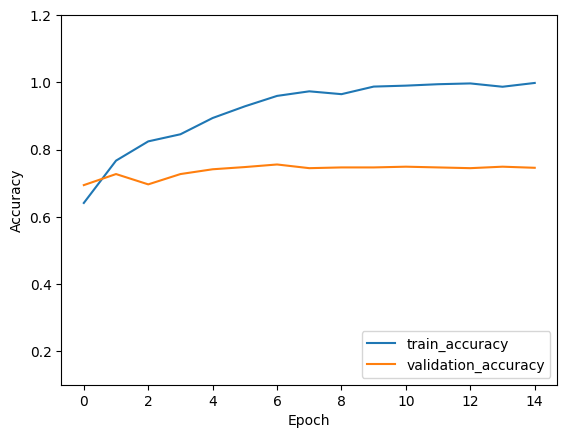

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1.2])
plt.legend(loc='lower right')

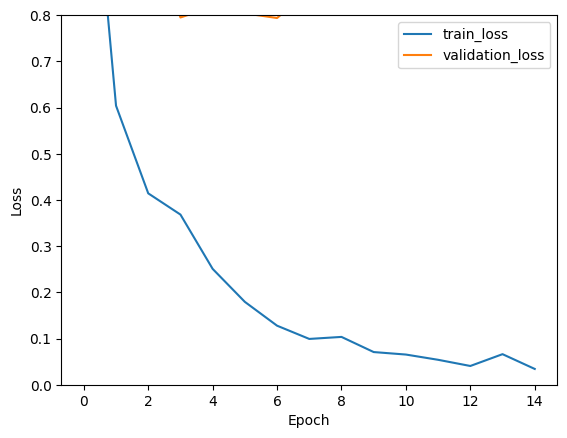

In [ ]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.8])
plt.legend(loc='upper right')

1/1 [==============================] - 1s 913ms/step


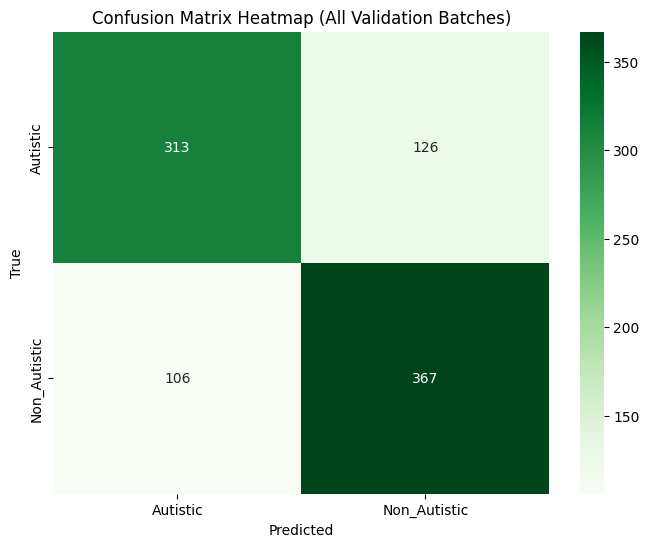

In [ ]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

class_names = ['Autistic','Non_Autistic']

all_val_labels = []
all_val_predictions = []

# Evaluate the model on the validation dataset batch by batch
for batch in val_ds:
    val_images, val_labels_batch = batch
    val_predictions_batch = model.predict(val_images)

    val_labels_batch = np.array(val_labels_batch)
    val_predictions_batch = np.argmax(val_predictions_batch, axis=-1)

    all_val_labels.extend(val_labels_batch)
    all_val_predictions.extend(val_predictions_batch)

# Calculate the confusion matrix for all validation data
conf_matrix = confusion_matrix(all_val_labels, all_val_predictions)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap (All Validation Batches)')
plt.show()

In [ ]:
print(classification_report(all_val_labels, all_val_predictions, target_names=class_names))

              precision    recall  f1-score   support

    Autistic       0.75      0.71      0.73       439
Non_Autistic       0.74      0.78      0.76       473

    accuracy                           0.75       912
   macro avg       0.75      0.74      0.74       912
weighted avg       0.75      0.75      0.75       912

